# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


In [3]:
sub_cities = cities[:100]
sub_cities

['port-aux-francais',
 'st anne',
 'suva',
 'adamstown',
 'tolanaro',
 'isafjordur',
 'atafu village',
 'iskateley',
 'wailua homesteads',
 'puerto natales',
 'west bay',
 'tiksi',
 'saint-francois',
 'nova sintra',
 'puerto baquerizo moreno',
 'papatowai',
 'urzhar',
 'qaqortoq',
 'bilibino',
 'lycksele',
 'toga village',
 'porto novo',
 'petropavlovsk-kamchatsky',
 'san patricio',
 'barah',
 'yellowknife',
 'floro',
 'soanierana ivongo',
 'shimo-furano',
 'upata',
 'taltal',
 'yaren',
 'albany',
 'keflavik',
 'remire-montjoly',
 'irymple',
 'waitangi',
 'barpeta',
 'shirvan',
 'yarmouth',
 'ushuaia',
 'broken hill',
 'puerto ayora',
 'opuwo',
 'grytviken',
 'yagry',
 'turan',
 'curuca',
 'ornskoldsvik',
 'pasuquin',
 'meadow lakes',
 'iqaluit',
 'surskoye',
 'west island',
 'edinburgh of the seven seas',
 'hermanus',
 'mejit',
 'beberibe',
 'tofol',
 'priyutnoye',
 'beohari',
 'saint-philippe',
 'nanzhang chengguanzhen',
 "ust'-kulom",
 'kinablangan',
 'klyuchi',
 'taro',
 'emerald',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
weather_api_key

'c51d8f33b786a921c465265fdc072a14'

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key + "&q=" + sub_cities[3]
url

'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=c51d8f33b786a921c465265fdc072a14&q=adamstown'

In [6]:
response = requests.get(url)
response

<Response [200]>

In [7]:
#response.json()

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)

        
        
        
        data = response.json()
        
       
        #if status_code == 200:
         #   data = response.json()
        #else:
         #   data = {} # failed request
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data.get("coord",{}).get("lat")
        city_lng = data.get("coord", {}).get("lon")
        city_max_temp = data.get("main", {}).get("temp_max")
        city_humidity = data.get("main", {}).get("humidity")
        city_clouds = data.get("clouds",{}).get("all")
        city_wind = data.get("wind", {}).get("speed")
        city_country = data.get("sys", {}).get("country")
        city_date = data.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | st anne
Processing Record 3 of Set 1 | suva
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | tolanaro
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | west bay
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | saint-francois
Processing Record 14 of Set 1 | nova sintra
Processing Record 15 of Set 1 | puerto baquerizo moreno
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | urzhar
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | lycksele
Processing Record 21 of Set 1 | toga village
Processing Record 22 of Set 1 | port

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.55,93.0,100.0,14.98,TF,1.726707e+09
1,st anne,49.7150,-2.2042,17.09,94.0,75.0,8.23,GG,1.726707e+09
2,suva,-18.1416,178.4415,24.71,61.0,75.0,3.60,FJ,1.726707e+09
3,adamstown,-25.0660,-130.1015,21.35,76.0,41.0,2.00,PN,1.726707e+09
4,tolanaro,-25.0319,46.9987,22.04,88.0,0.0,8.23,MG,1.726707e+09


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.55,93.0,100.0,14.98,TF,1.726707e+09
1,st anne,49.7150,-2.2042,17.09,94.0,75.0,8.23,GG,1.726707e+09
2,suva,-18.1416,178.4415,24.71,61.0,75.0,3.60,FJ,1.726707e+09
3,adamstown,-25.0660,-130.1015,21.35,76.0,41.0,2.00,PN,1.726707e+09
4,tolanaro,-25.0319,46.9987,22.04,88.0,0.0,8.23,MG,1.726707e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

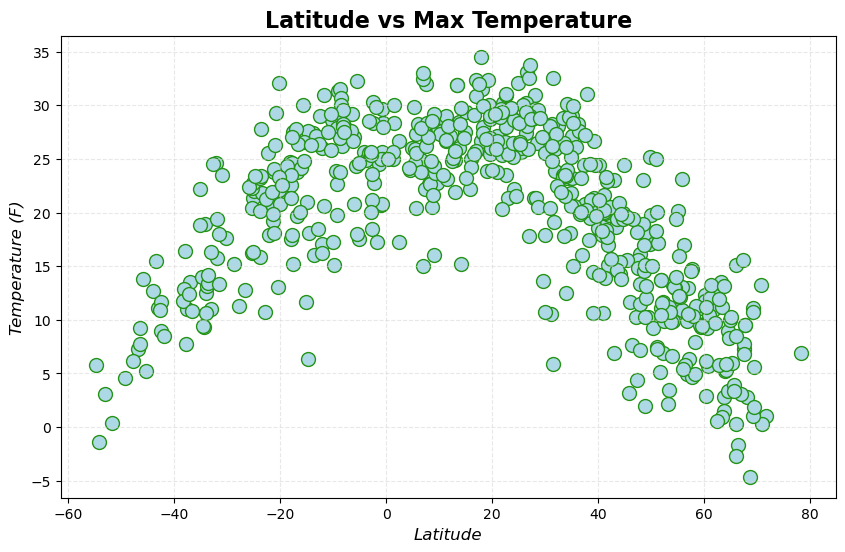

In [13]:
# Build scatter plot for latitude vs. temperature
# Step 1: Get the Data
x = city_data_df['Lat'] 
y = city_data_df['Max Temp']
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="#add8e6", edgecolor="#249316", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Max Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

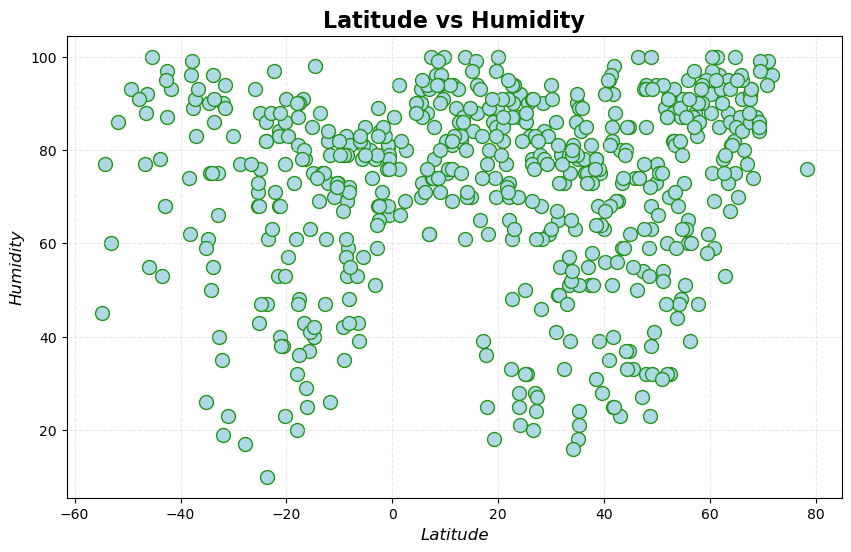

In [14]:
# Build the scatter plots for latitude vs. humidity
# Step 1: Get the Data
x = city_data_df['Lat'] 
y = city_data_df['Humidity']
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="#add8e6", edgecolor="#249316", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

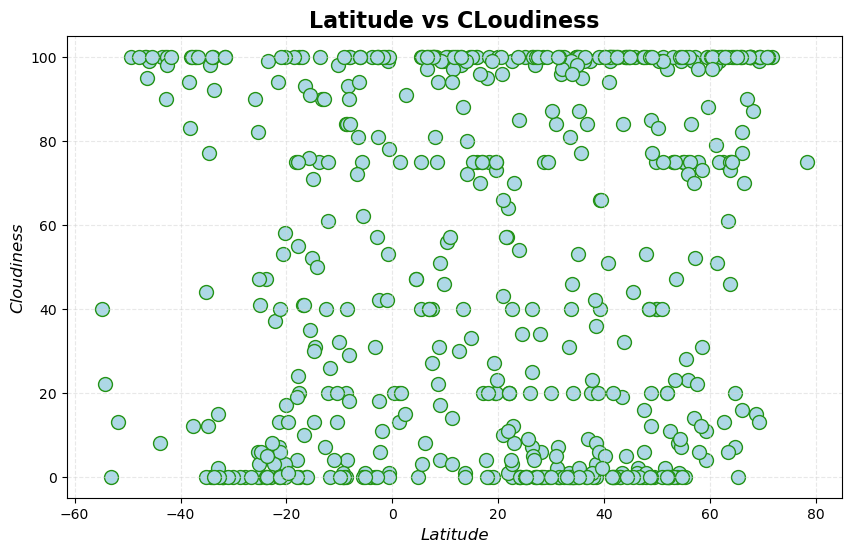

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# Step 1: Get the Data
x = city_data_df['Lat'] 
y = city_data_df['Cloudiness']
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="#add8e6", edgecolor="#249316", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs CLoudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

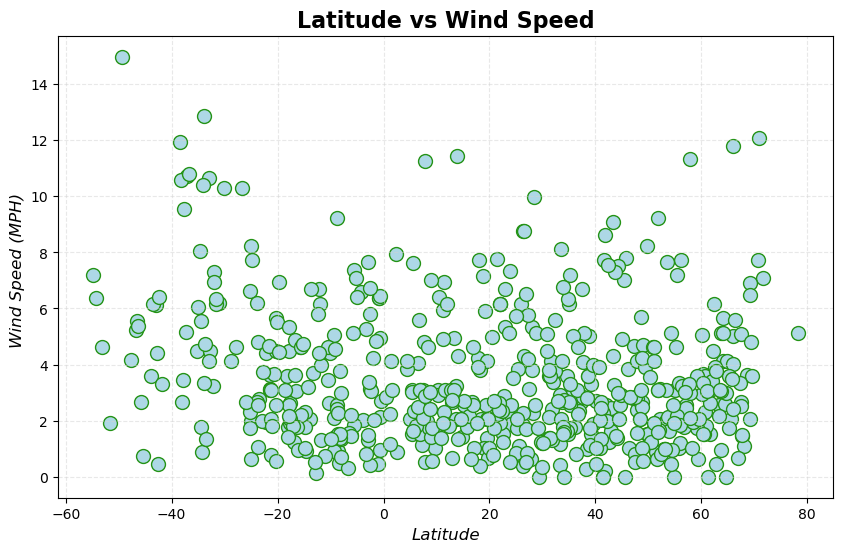

In [16]:
# Build the scatter plots for latitude vs. wind speed
# Step 1: Get the Data
x = city_data_df['Lat'] 
y = city_data_df['Wind Speed']
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="#add8e6", edgecolor="#249316", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (MPH) ", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Define a function to create Linear Regression plots
# makes the line of best fit
def plot_linregression(xvalues,yvalues,title):
    (slope, intercept,rvalue,pvalue,stderr) = linregress(xvalues,yvalues)
    regression_values = xvalues * slope + intercept

    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,regression_values,"r-")
    plt.title(title)
    plt.xlabel("Lat")
    plt.ylabel(yvalues.name)
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0 )]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,st anne,49.7150,-2.2042,17.09,94.0,75.0,8.23,GG,1.726707e+09
5,isafjordur,66.0755,-23.1240,0.25,85.0,82.0,5.02,IS,1.726707e+09
7,iskateley,67.6803,53.1512,9.53,93.0,100.0,1.45,RU,1.726707e+09
8,wailua homesteads,22.0669,-159.3780,29.44,73.0,20.0,6.17,US,1.726707e+09
10,west bay,19.3667,-81.4167,30.04,74.0,20.0,2.57,KY,1.726707e+09


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0 )]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.55,93.0,100.0,14.98,TF,1.726707e+09
2,suva,-18.1416,178.4415,24.71,61.0,75.0,3.60,FJ,1.726707e+09
3,adamstown,-25.0660,-130.1015,21.35,76.0,41.0,2.00,PN,1.726707e+09
4,tolanaro,-25.0319,46.9987,22.04,88.0,0.0,8.23,MG,1.726707e+09
6,atafu village,-8.5421,-172.5159,27.57,69.0,4.0,0.93,TK,1.726707e+09


###  Temperature vs. Latitude Linear Regression Plot

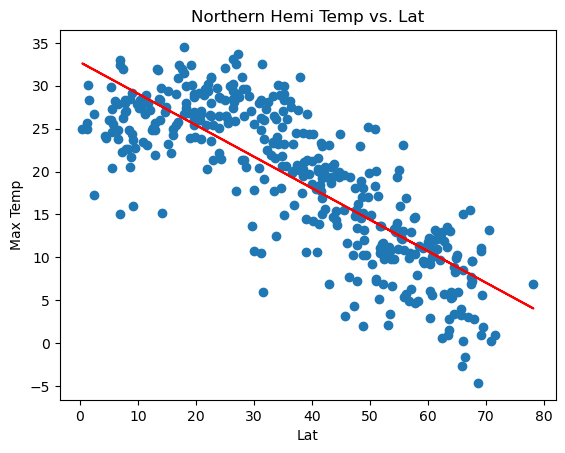

In [21]:
# Linear regression on Northern Hemisphere
plot_linregression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], title="Northern Hemi Temp vs. Lat")




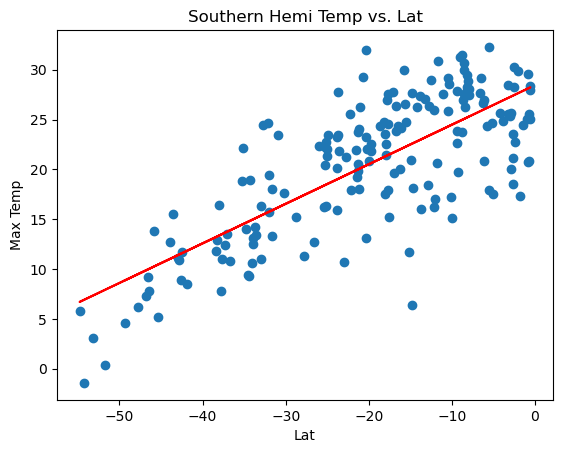

In [22]:
# Linear regression on Southern Hemisphere
plot_linregression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], title="Southern Hemi Temp vs. Lat")

**Discussion about the linear relationship:** Positive relationship; as latitude increases so does the temperature. The closer the latitude value is to 0, the closer to the equator we are measuring, so a rise in temperature makes sense as globally the highest temperatures are recorded around or on the equator. 

### Humidity vs. Latitude Linear Regression Plot

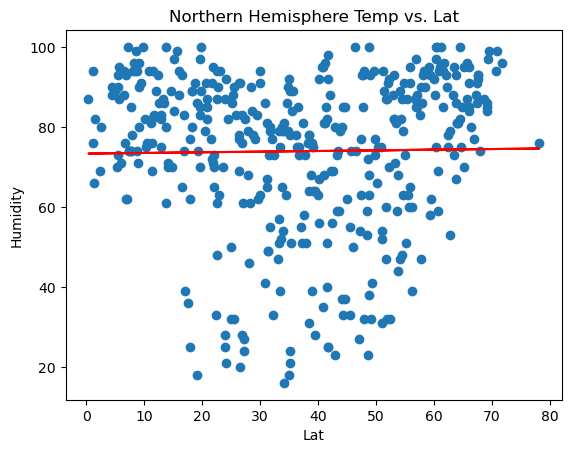

In [23]:
# Northern Hemisphere
plot_linregression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], title="Northern Hemisphere Temp vs. Lat")

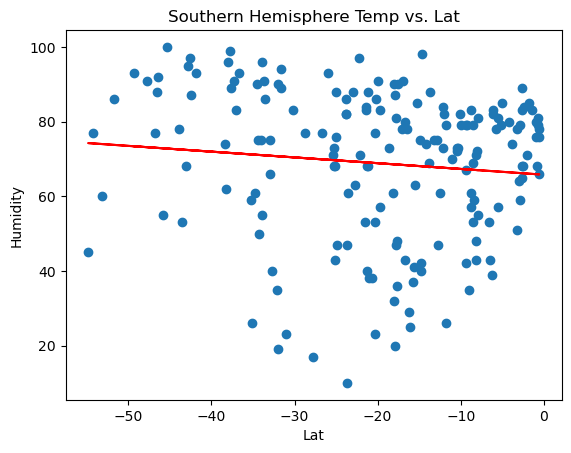

In [24]:
# Southern Hemisphere
plot_linregression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], title="Southern Hemisphere Temp vs. Lat")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

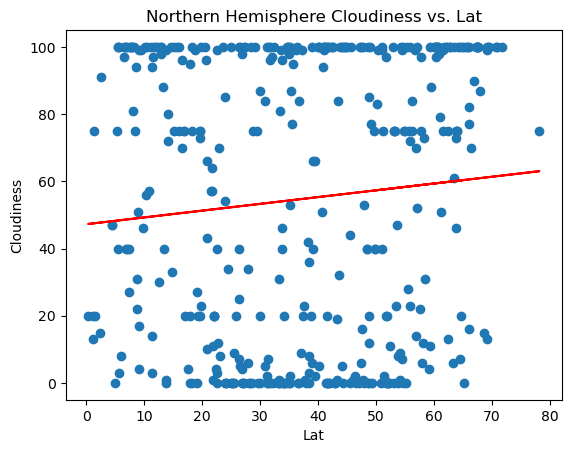

In [25]:
# Northern Hemisphere
plot_linregression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], title="Northern Hemisphere Cloudiness vs. Lat")

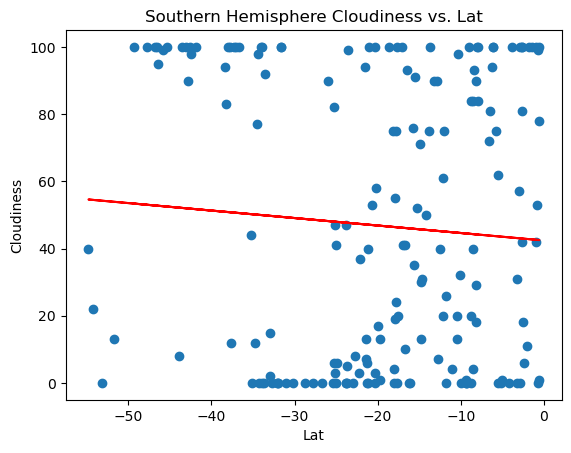

In [26]:
# Southern Hemisphere
plot_linregression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], title="Southern Hemisphere Cloudiness vs. Lat")

**Discussion about the linear relationship:** Slightly negative relationship - as latitude increases, cloudiness decreases. But overall looking at graph, data markers are pretty widely distrubuted and the line of best fit doesn't feel incredibly accurate or reflective of data. 

### Wind Speed vs. Latitude Linear Regression Plot

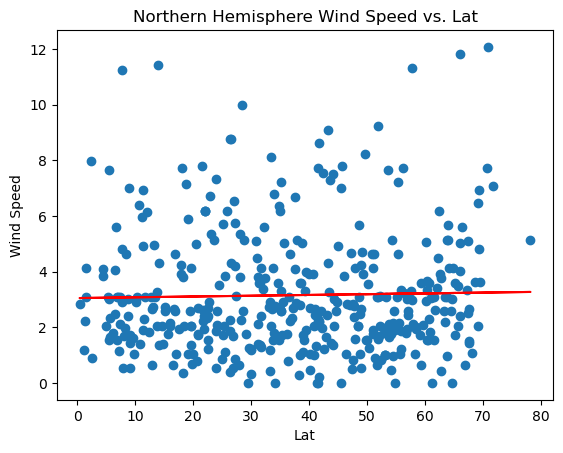

In [27]:
# Northern Hemisphere
plot_linregression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], title="Northern Hemisphere Wind Speed vs. Lat")

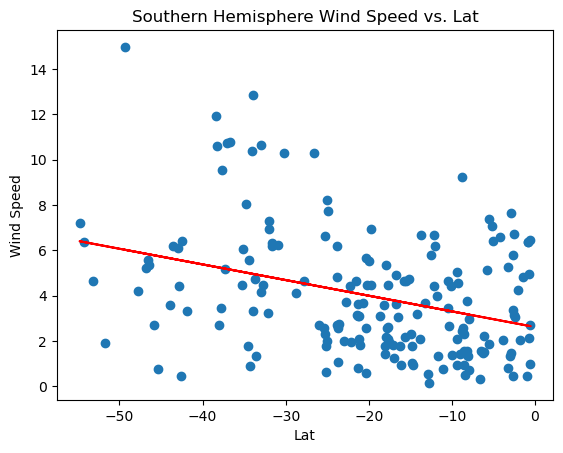

In [28]:
# Southern Hemisphere
plot_linregression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], title="Southern Hemisphere Wind Speed vs. Lat")

**Discussion about the linear relationship:** Clear negative relationship - as latitude increases, wind speed decreases. Line of best fit accurately reflects data as we see concentrations of data markers in the bottom half of the screen moving closer and closer to axis. 